#  Spam Mail Detection Project
This project classifies messages as **Spam** or **Ham (Not Spam)** using simple text preprocessing and a machine learning model.

##  Introduction
We will use the SMS Spam Collection dataset. It contains labeled messages that are either **ham** (not spam) or **spam**. We will clean the text, convert it into numeric features, train a classifier, and evaluate its performance.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import urllib.request
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##  Download Dataset Automatically

In [11]:
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
urllib.request.urlretrieve(url, 'spam.tsv')
df = pd.read_csv('spam.tsv', sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##  Data Visualization

C:\Users\azras\AppData\Local\Temp\ipykernel_2424\2210384834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


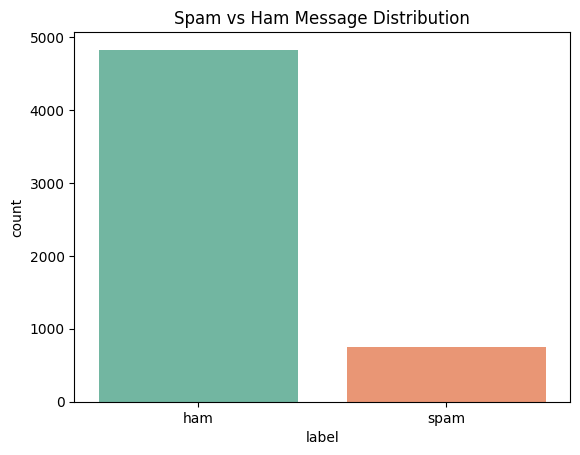

In [12]:
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Spam vs Ham Message Distribution')
plt.show()

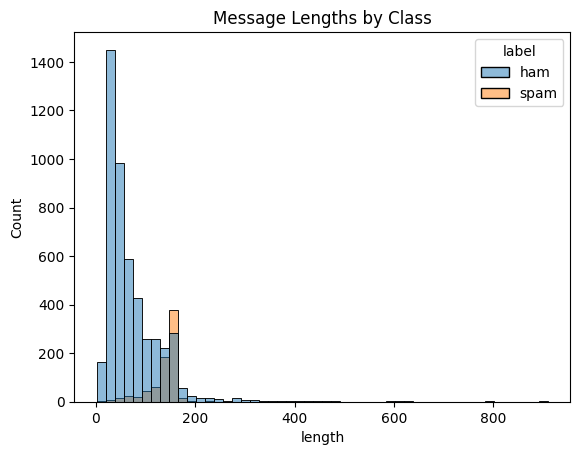

In [13]:
df['length'] = df['message'].apply(len)
sns.histplot(df, x='length', bins=50, hue='label', kde=False)
plt.title('Message Lengths by Class')
plt.show()

##  Text Preprocessing

In [17]:
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,length,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though


##  Feature Extraction (TF-IDF)

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label'].map({'ham':0, 'spam':1})

##  Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Training and Evaluation

In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



##  Confusion Matrix

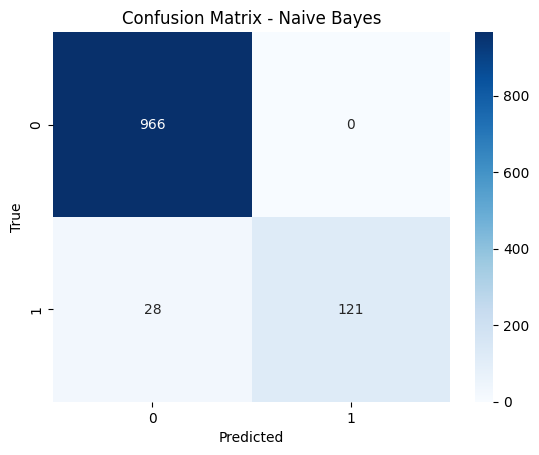

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##  Conclusion
- Naive Bayes performed well for spam detection.
- The model is simple, fast, and accurate.
- This shows how basic NLP techniques can be used for real-world tasks.